In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [46]:
DATA_FOLDER = '../data/'
DATA_ZIP = DATA_FOLDER + 'datasets.zip'

DATA_TRAIN_PATH = DATA_FOLDER + 'train.csv'
DATA_TEST_PATH = DATA_FOLDER + 'test.csv' 

# Load the training data

In [47]:
from proj1_helpers import *
from split_data import *
from data_processing import *

y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
y_clean_cat, tX_clean_cat, ids_clean_cat = clean_by_cat(y, tX, ids)

# Creating training and validation sets

In [4]:
split_ratio = 0.5
tX_train, tX_validation, y_train, y_validation = split_data(tX, y, split_ratio)
tX_train_clean, tX_validation_clean, y_train_clean, y_validation_clean = split_data(tX_clean, y_clean, split_ratio)

In [5]:
print("Raw set : ")
row_format = "{:<15}" * 3
print(row_format.format("", "Training", "Validation"))
print(row_format.format("Features", str(tX_train.shape), str(tX_validation.shape)))
print(row_format.format("Labels", str(y_train.shape), str(y_validation.shape)))

print("\nClean set : ")
row_format = "{:<15}" * 3
print(row_format.format("", "Training", "Validation"))
print(row_format.format("Features", str(tX_train_clean.shape), str(tX_validation_clean.shape)))
print(row_format.format("Labels", str(y_train_clean.shape), str(y_validation_clean.shape)))

Raw set : 
               Training       Validation     
Features       (125000, 30)   (125000, 30)   
Labels         (125000,)      (125000,)      

Clean set : 
               Training       Validation     
Features       (76828, 30)    (76827, 30)    
Labels         (76828,)       (76827,)       


# Testing every basic model on cleaned data

In [53]:
from pipeline import *
from cross_validation import find_best_parameter

### Gradient Descent

In [56]:
max_iters = 100
gamma = 0.1

for (y, x, _) in categories:
    weights, loss = model_data(y, x, 'gradient_descent', max_iters=max_iters, gamma=gamma)

    # Not compared with the not cleaned set, because it needs normalizing to work
    print("Training loss : {}".format(loss))

Training loss : 0.30374796224544304
Training loss : 0.36727619385427007
Training loss : 0.32700527708038984
Training loss : 0.3333933012101565


In [70]:
gammas = np.logspace(-4, -0.5, 15)

for i in range(4):
    best_gamma, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'gradient_descent', 'gamma', gammas, max_iters=100)
    print(best_gamma, best_loss)

KeyboardInterrupt: 

### Stochastic Gradient Descent

In [81]:
max_iters = 1000
gamma = 0.05

for i in range(4):
    weights, loss = model_data(y_clean_cat[i], tX_clean_cat[i], 'stochastic_gradient_descent', max_iters=max_iters, gamma=gamma, poly_exp=2)
    print("Training loss : {}".format(loss))

Training loss : 0.2957538979689135
Training loss : 0.33538545080474025
Training loss : 0.2951068354297638
Training loss : 0.3327053728390424


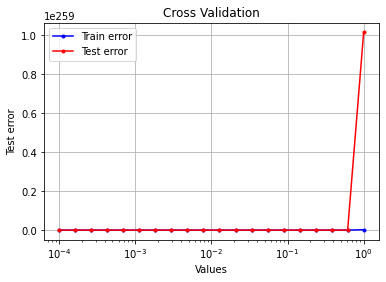

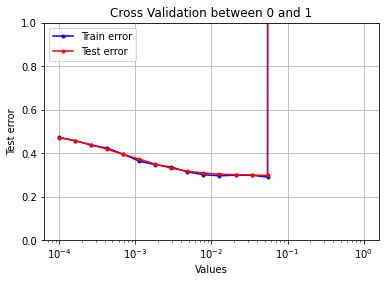

Best gamma is 0.05455594781168514 with loss 0.29696321029517303


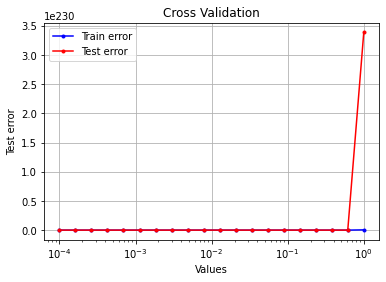

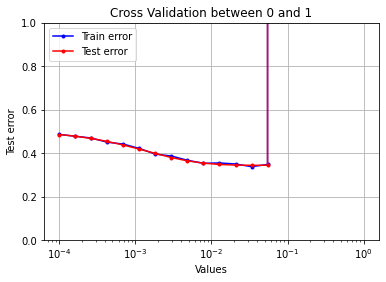

Best gamma is 0.03359818286283781 with loss 0.34337078649727726


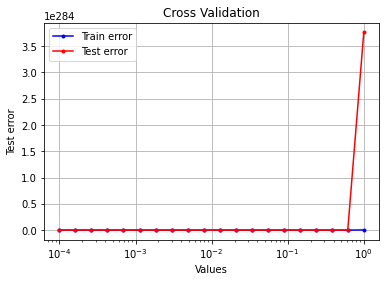

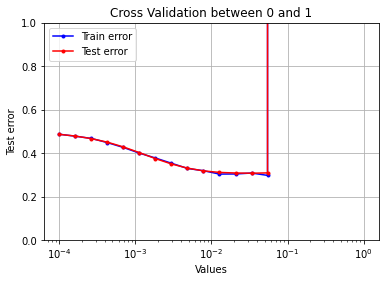

Best gamma is 0.03359818286283781 with loss 0.307077360708906


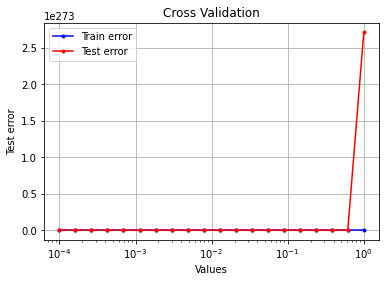

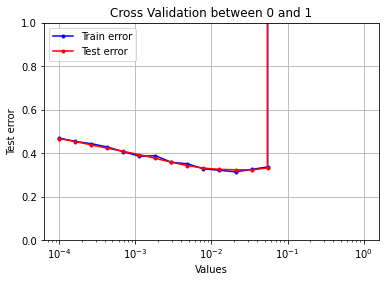

Best gamma is 0.03359818286283781 with loss 0.3224973944076842


In [90]:
gammas = np.logspace(-4, 0, 20)

for i in range(4):
    best_gamma, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'stochastic_gradient_descent', 'gamma', gammas, max_iters=100, poly_exp=2)
    print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

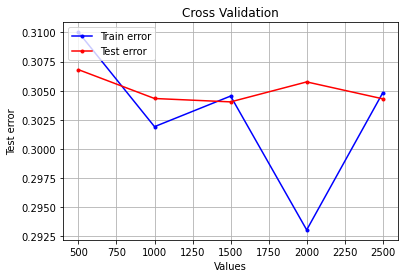

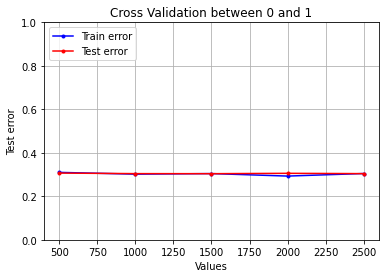

Best max_iters is 1500 with loss 0.3040449768636649


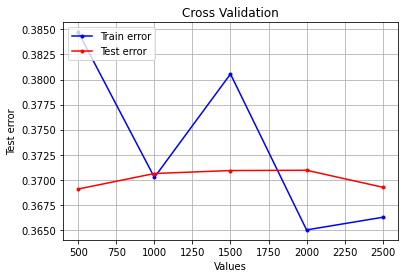

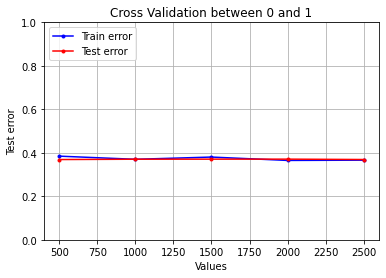

Best max_iters is 500 with loss 0.369077095125499


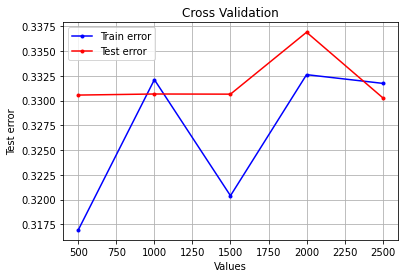

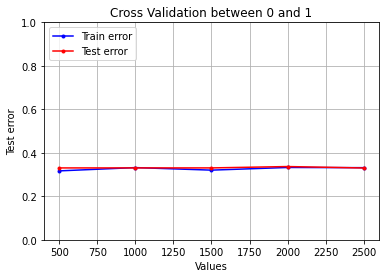

Best max_iters is 2500 with loss 0.3302860789623407


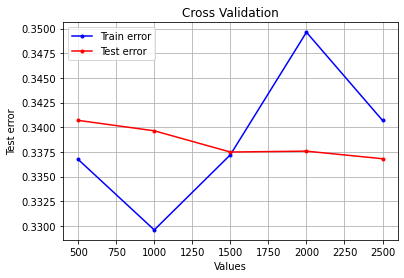

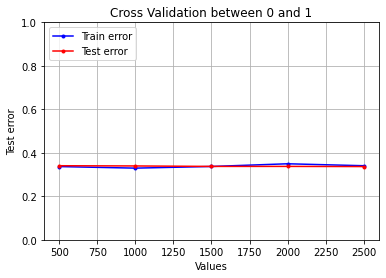

Best max_iters is 2500 with loss 0.33681152658535923


In [93]:
max_iter_values = (np.arange(5)+1)*500

for i in range(4):
    best_iter, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'stochastic_gradient_descent', 'max_iters', max_iter_values, logspace=False, gamma=0.3, poly_exp=1)
    print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

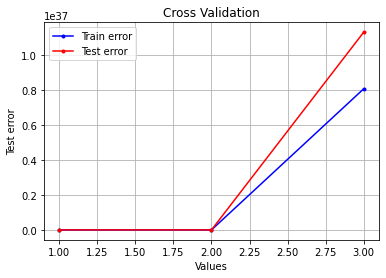

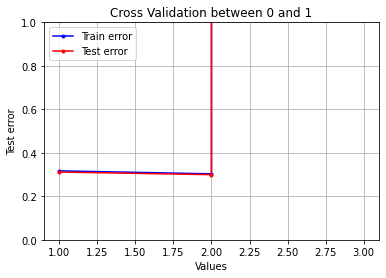

Best max_iters is 7 with loss nan


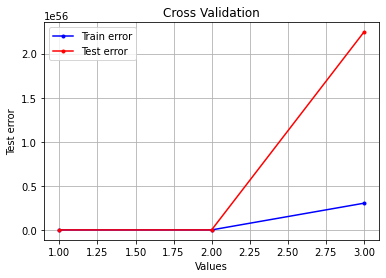

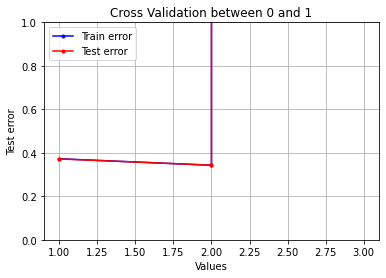

Best max_iters is 7 with loss nan


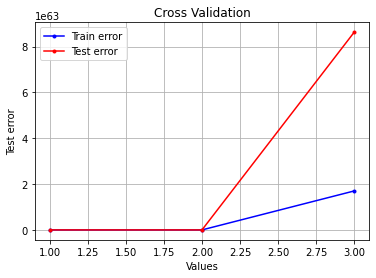

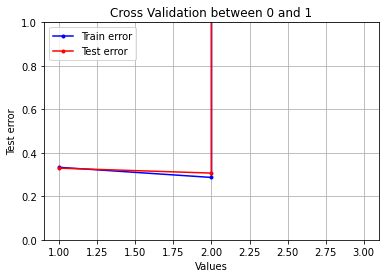

Best max_iters is 7 with loss nan


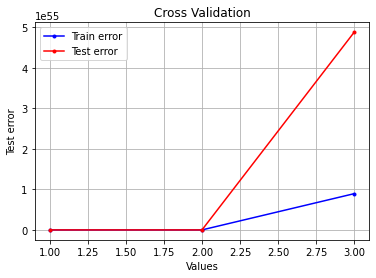

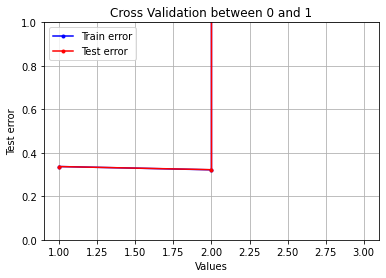

Best max_iters is 7 with loss nan


In [92]:
expansion_values = [1, 2, 3]
for i in range(4):
    best_iter, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'stochastic_gradient_descent', 'poly_exp', expansion_values, logspace=False, k_fold=4, max_iters=100, gamma=0.03)
    print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

### Least Squares

Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 19, for D = 19
Rank of the matrix is 37, for D = 37
Rank of the matrix is 37, for D = 37
Rank of the matrix is 37, for D = 37
Rank of the matrix is 37, for D = 37
Rank of the matrix is 54, for D = 55
Rank of the matrix is 54, for D = 55
Rank of the matrix is 54, for D = 55
Rank of the matrix is 54, for D = 55
Rank of the matrix is 70, for D = 73
Rank of the matrix is 70, for D = 73
Rank of the matrix is 70, for D = 73
Rank of the matrix is 70, for D = 73
Rank of the matrix is 87, for D = 91
Rank of the matrix is 87, for D = 91
Rank of the matrix is 87, for D = 91
Rank of the matrix is 87, for D = 91
Rank of the matrix is 103, for D = 109
Rank of the matrix is 103, for D = 109
Rank of the matrix is 103, for D =

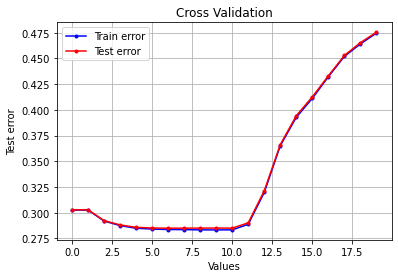

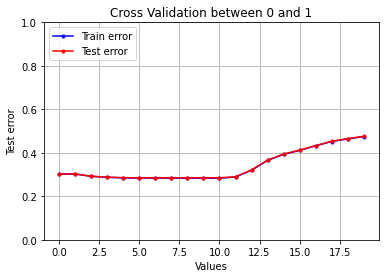

Best max_iters is 6 with loss 0.2848838559716219
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 23, for D = 23
Rank of the matrix is 45, for D = 45
Rank of the matrix is 45, for D = 45
Rank of the matrix is 45, for D = 45
Rank of the matrix is 45, for D = 45
Rank of the matrix is 67, for D = 67
Rank of the matrix is 67, for D = 67
Rank of the matrix is 67, for D = 67
Rank of the matrix is 67, for D = 67
Rank of the matrix is 87, for D = 89
Rank of the matrix is 86, for D = 89
Rank of the matrix is 87, for D = 89
Rank of the matrix is 87, for D = 89
Rank of the matrix is 107, for D = 111
Rank of the matrix is 107, for D = 111
Rank of the matrix is 107, for D = 111
Rank of the matrix is 107, for D = 111
Rank of the matrix is 127, for D = 133
Rank of the matr

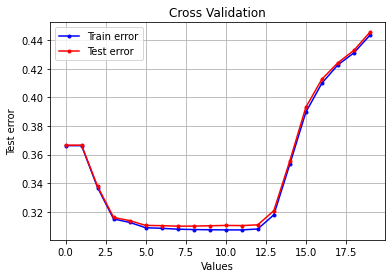

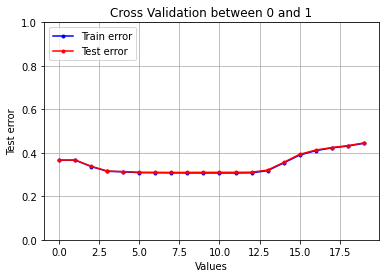

Best max_iters is 7 with loss 0.30991825628972347
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 144, for D = 146
Rank of the matrix is 144, for D = 146
Rank of the matrix is 144, for D = 146
Rank of the matrix is 144, for D = 146
Rank of the matrix is 173, for D = 175
Rank of

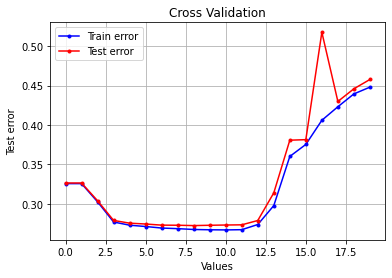

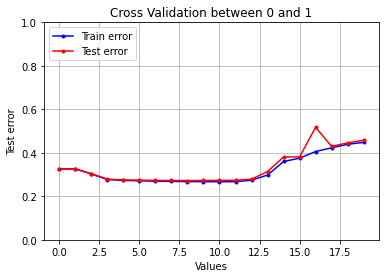

Best max_iters is 8 with loss 0.2725281577264511
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 30, for D = 30
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 59, for D = 59
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 88, for D = 88
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 117, for D = 117
Rank of the matrix is 145, for D = 146
Rank of the matrix is 145, for D = 146
Rank of the matrix is 145, for D = 146
Rank of the matrix is 145, for D = 146
Rank of the matrix is 174, for D = 175
Rank of 

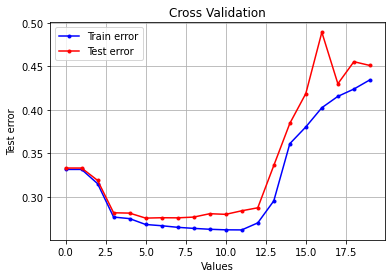

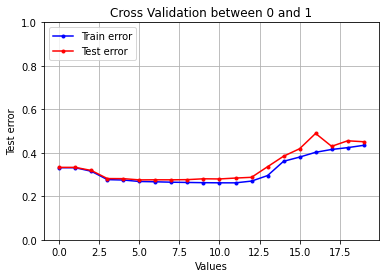

Best max_iters is 5 with loss 0.27552478961706145


In [94]:
expansion_values = np.arange(20)

for i in range(4):
    best_iter, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'least_squares', 'poly_exp', expansion_values, logspace=False)
    print("Best degree is {} with loss {}".format(best_iter, best_loss))

### Ridge Regression

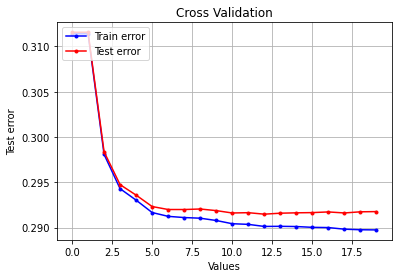

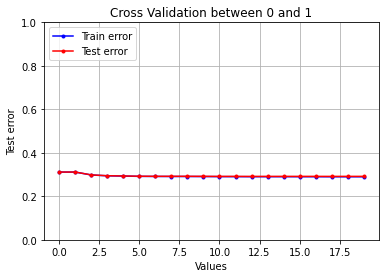

Best max_iters is 12 with loss 0.2914838412397338


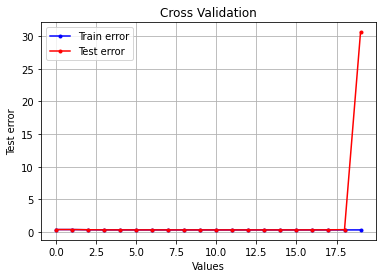

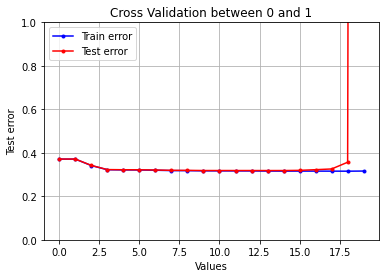

Best max_iters is 13 with loss 0.3184957079777266


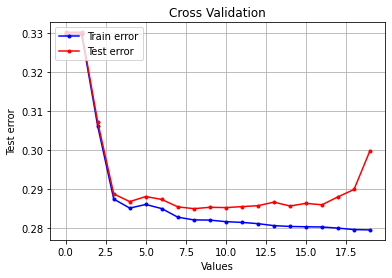

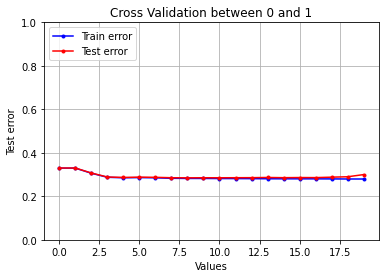

Best max_iters is 8 with loss 0.2850142723438653


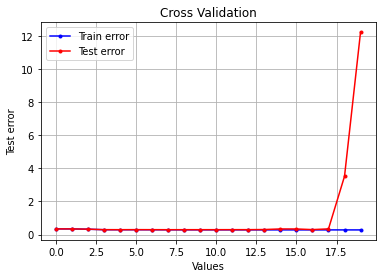

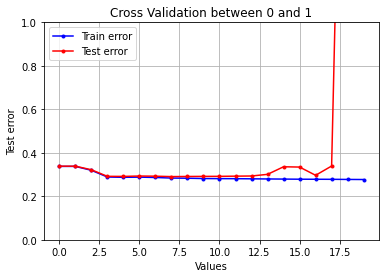

Best max_iters is 7 with loss 0.29066624270568825


In [110]:
expansion_values = np.arange(20)
for i in range(4):
    best_iter, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'ridge_regression', 'poly_exp', expansion_values, logspace=False, lambda_=0.1)
    print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

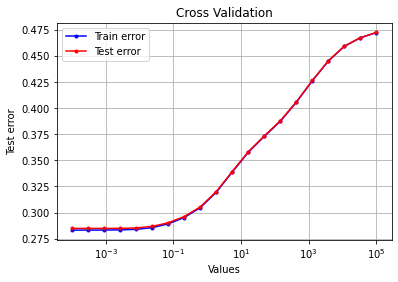

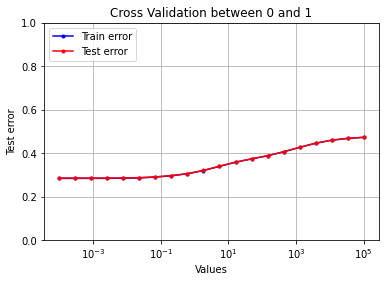

Best lambda is 0.0008858667904100823 with loss 0.2849253671980902


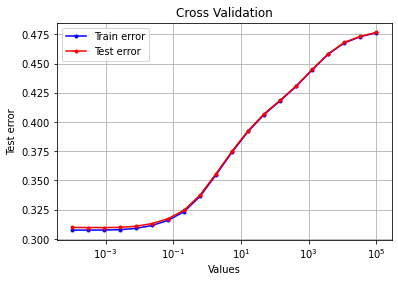

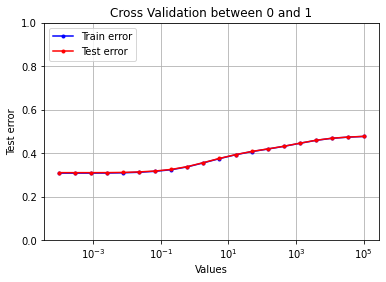

Best lambda is 0.0008858667904100823 with loss 0.30976325864850696


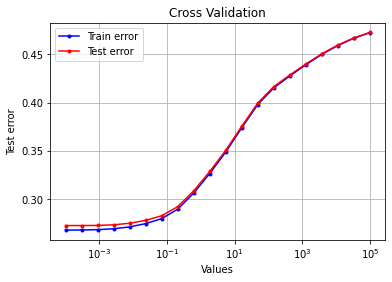

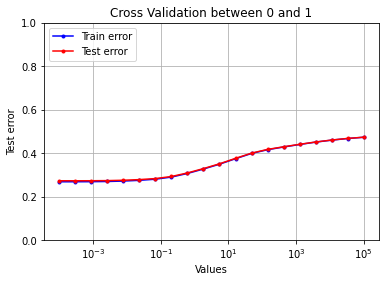

Best lambda is 0.00029763514416313193 with loss 0.2724190573525308


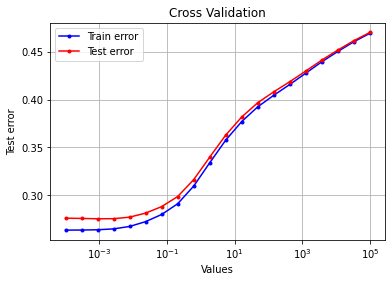

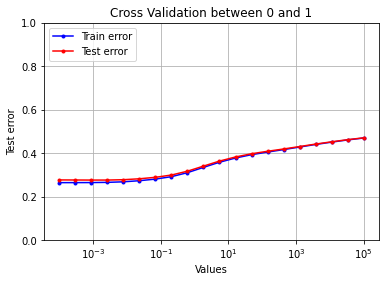

Best lambda is 0.0008858667904100823 with loss 0.2756265275042834


In [111]:
lambdas = np.logspace(-4, 5, 20)

for i in range(4):
    best_lambda, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'ridge_regression', 'lambda_', lambdas, poly_exp=8)
    print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

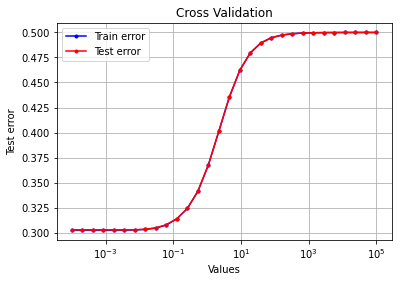

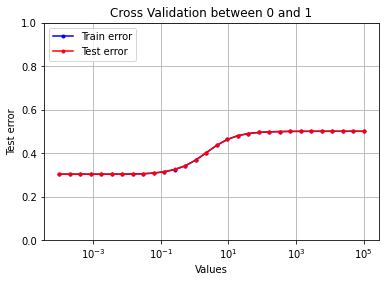

Best lambda is 0.00020433597178569417 with loss 0.3027657391767248


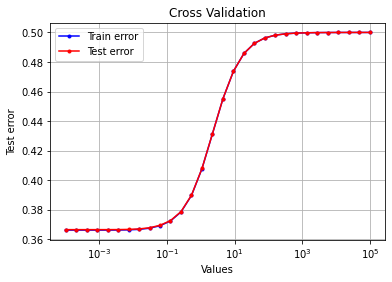

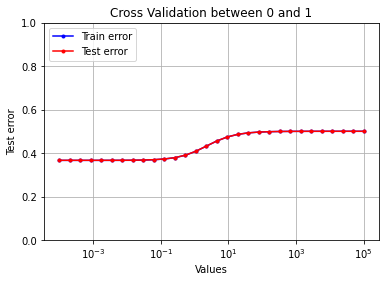

Best lambda is 0.00020433597178569417 with loss 0.3665469595290073


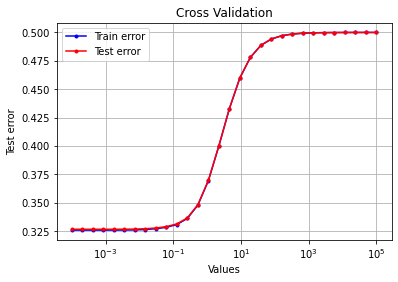

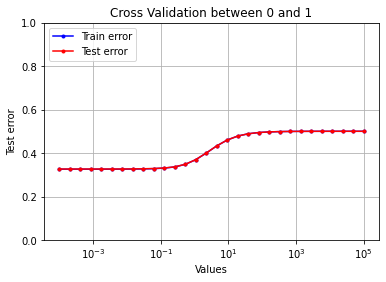

Best lambda is 0.00041753189365604 with loss 0.3264665733830705


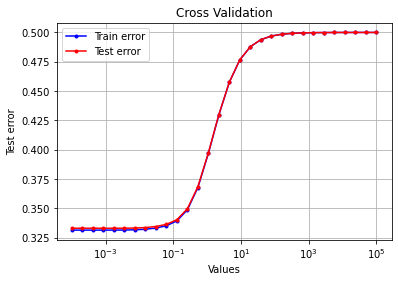

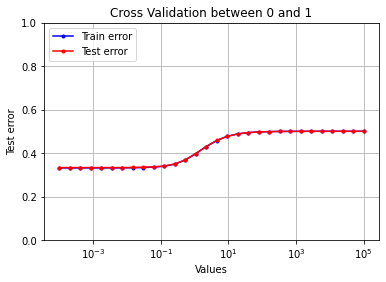

Best lambda is 0.0008531678524172815 with loss 0.33306854313108986


In [112]:
lambdas = np.logspace(-4, 5, 30)

for i in range(4):
    best_lambda, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'ridge_regression', 'lambda_', lambdas, poly_exp=1)
    print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

### Logistic Regression

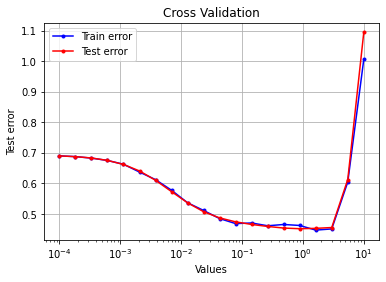

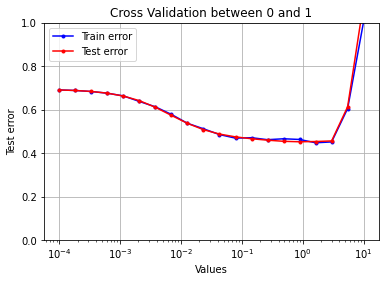

Best gamma is 0.8858667904100823 with loss 0.45171579726296684


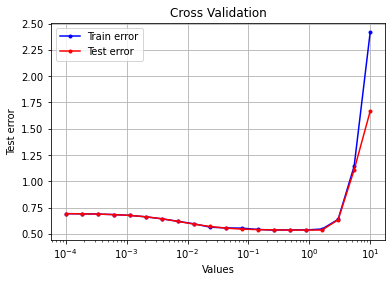

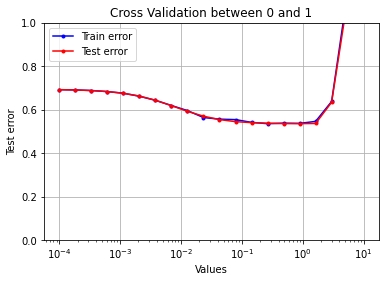

Best gamma is 0.8858667904100823 with loss 0.5352260276629419


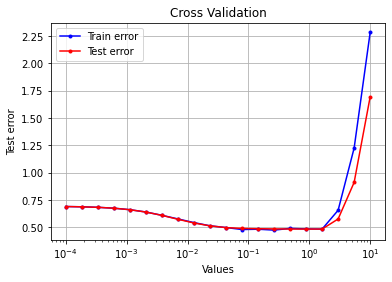

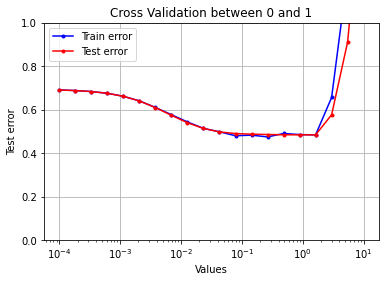

Best gamma is 0.8858667904100823 with loss 0.483538878809359


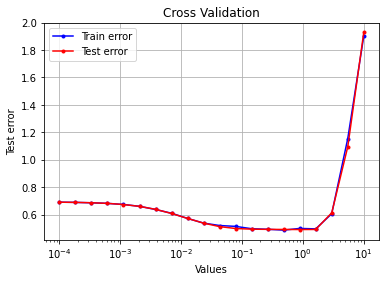

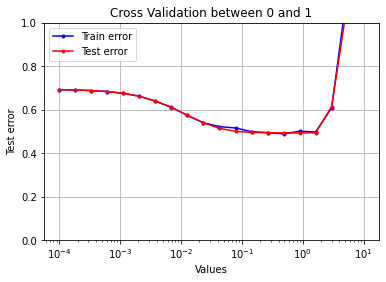

Best gamma is 0.8858667904100823 with loss 0.492200576011202


In [113]:
gammas = np.logspace(-4, 1, 20)

for i in range(4):
    best_gamma, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'logistic_regression', 'gamma', gammas, max_iters=150, poly_exp=1)
    print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

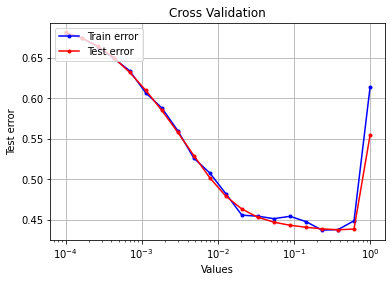

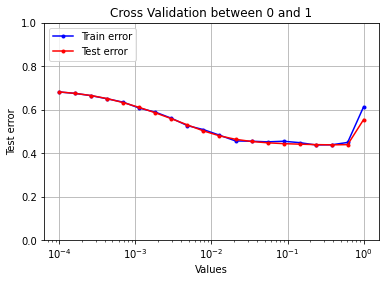

Best gamma is 0.3792690190732246 with loss 0.4375857596691979


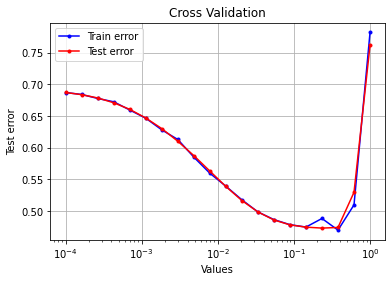

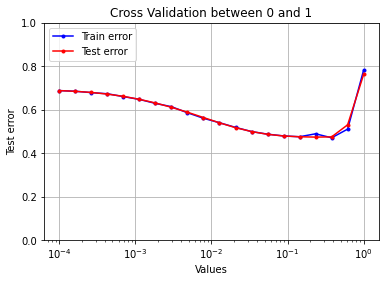

Best gamma is 0.23357214690901212 with loss 0.47325151349732214


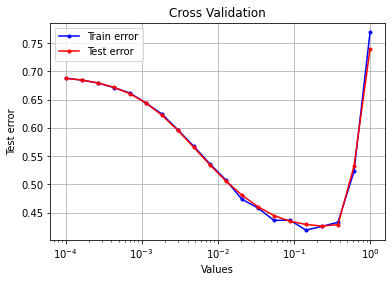

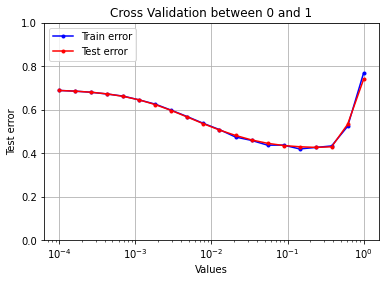

Best gamma is 0.23357214690901212 with loss 0.4259628914901804


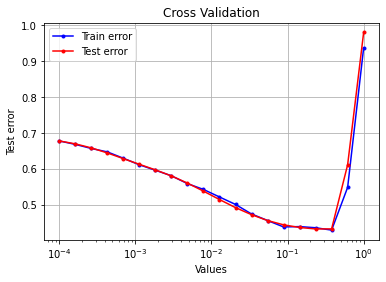

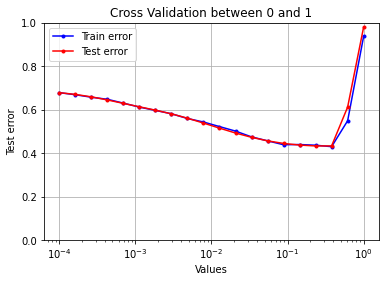

Best gamma is 0.23357214690901212 with loss 0.43253834547789594


In [114]:
gammas = np.logspace(-4, 0, 20)

for i in range(4):
    best_gamma, best_loss = find_best_parameter(y_clean_cat[i], tX_clean_cat[i], 'logistic_regression', 'gamma', gammas, max_iters=150, poly_exp=2)
    print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

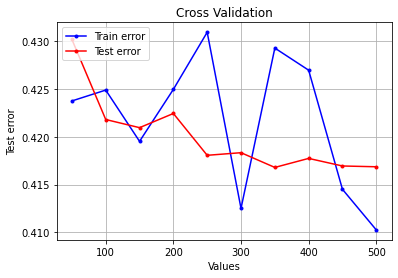

Best max_iters is 350 with loss 0.4167930162264529


In [322]:
iters = (np.arange(10)+1)*50

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'logistic_regression', 'max_iters', iters, logspace=False, gamma=0.15, poly_exp=2)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

### Penalized Logistic Regression

C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\logistic_regression.py:7: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)
C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\costs.py:28: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()


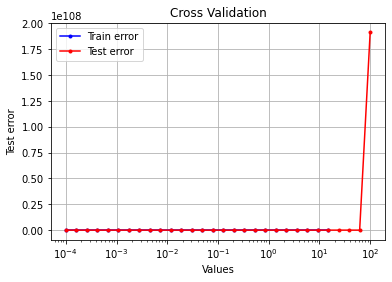

Best lambda is 0.0001 with loss 0.4240364250114062


In [329]:
lambdas = np.logspace(-4, 2, 30)

best_lambda, best_loss = find_best_parameter(y_clean, tX_clean, 'regularized_logistic_regression', 'lambda_', lambdas, max_iters=150, gamma=0.1, poly_exp=2)
print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

## Generate predictions and save ouput in csv format for submission:

In [270]:
#This enable to run all cells without running this one when unnecessary
if True :
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    y_test_clean, tX_test_clean, ids_test_clean = clean_test(y_test, tX_test, ids_test)
    tX_test_clean_poly = build_poly_2D(tX_test_clean, 2)
    OUTPUT_PATH = DATA_FOLDER + 'submission.csv' 
    if True: ## Only for logistic regression, we will do something nice later
        y_pred = predict_labels_logistic(weights_clean, tX_test_clean_poly)
    else:
        y_pred = predict_labels(weights, tX_test_clean_poly)
    create_csv_submission(ids_test_clean, y_pred, OUTPUT_PATH)
else :
    print("Change False to True to generate prediction")

ValueError: shapes (568238,87) and (90,) not aligned: 87 (dim 1) != 90 (dim 0)

In [25]:
def model_accuracy(weights, tX, correct_labels, logistic=False):
    if logistic :
        pred = predict_labels_logistic(weights, tX)
    else :
        pred = predict_labels(weights, tX)
    compare_array = (pred == correct_labels)
    return np.count_nonzero(compare_array)/len(compare_array)
    

In [26]:
#model_accuracy testing
weights, loss = model_data(y_train_clean, tX_train_clean, 'stochastic_gradient_descent', max_iters=180, gamma=0.24, poly_exp=2)
tX_poly = build_poly_2D(tX_validation_clean, 2)
print(model_accuracy(weights, tX_poly, y_validation_clean))

0.6941179533237013
